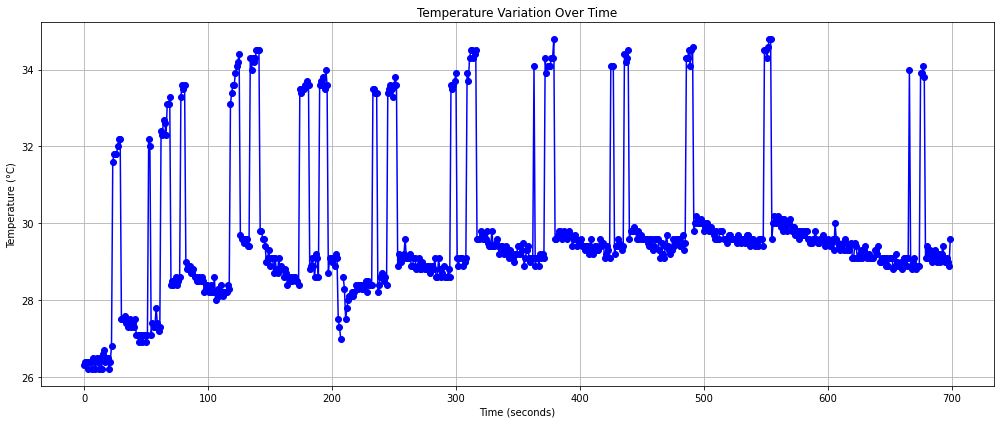

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

log_file_path = 'C:\\Users\\91742\\Desktop\\Vavye Mobility\\Projects\\PID_Temperature_Plot\\Temperature3.log'

with open(log_file_path, 'r') as file:
    temperature_data = file.read().strip().split(',')

temperature_values = [float(temp) for temp in temperature_data if temp]

z_scores = zscore(temperature_values)
z_score_threshold = 2.0

filtered_temperature_values = [temp if abs(z) < z_score_threshold else None for temp, z in zip(temperature_values, z_scores)]

df = pd.DataFrame(filtered_temperature_values, columns=['Temperature'])

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-', color='b')
plt.title('Temperature Variation Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_csv('temperature_data_filtered.csv', index=False)
